In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Frame Information 
df = pd.read_excel("/home/jupyter-user-3/shared_documents/shared_data_read_only/Data/AfriKids/InternalData/Project_Surveys/Final Data Rapid_Assessment Cleaned Data Shared.xlsx")
df.shape

(1233, 167)

[Text(0.5, 0, 'District'),
 Text(0, 0.5, 'Mean Number of People in the House'),
 Text(0.5, 1.0, 'Mean Number of Missed Days per District')]

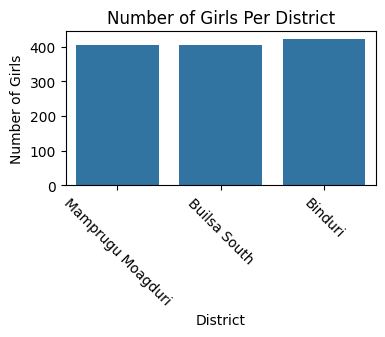

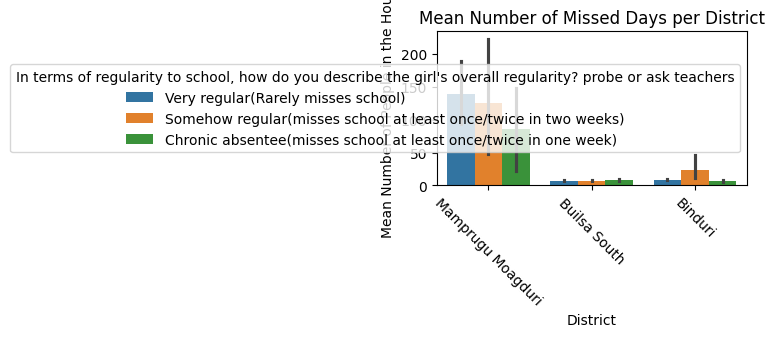

In [167]:
# View Statistics Across Districts 

# Number in Each District 
plt.figure(figsize=(4, 2))
plt.xticks(rotation=-45)
district_dist = sns.countplot(x="District", data=df)
district_dist.set(xlabel="District", ylabel="Number of Girls", title="Number of Girls Per District")

# Get the Mean Attendance Per District 
plt.figure(figsize=(4, 2))
plt.xticks(rotation=-45)
mean_attend = sns.barplot(x="District", y="How many people does girl live with in her household?", hue="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", data=df, estimator="mean")
mean_attend.set(xlabel="District", ylabel="Mean Number of People in the House", title = "Mean Number of Missed Days per District")
                     



# Add Factors for Noise - Split up Current Graphs

# Look into why looking at Girls in Ghana in these Regions is Important 

<Figure size 640x480 with 0 Axes>

<Figure size 900x600 with 0 Axes>

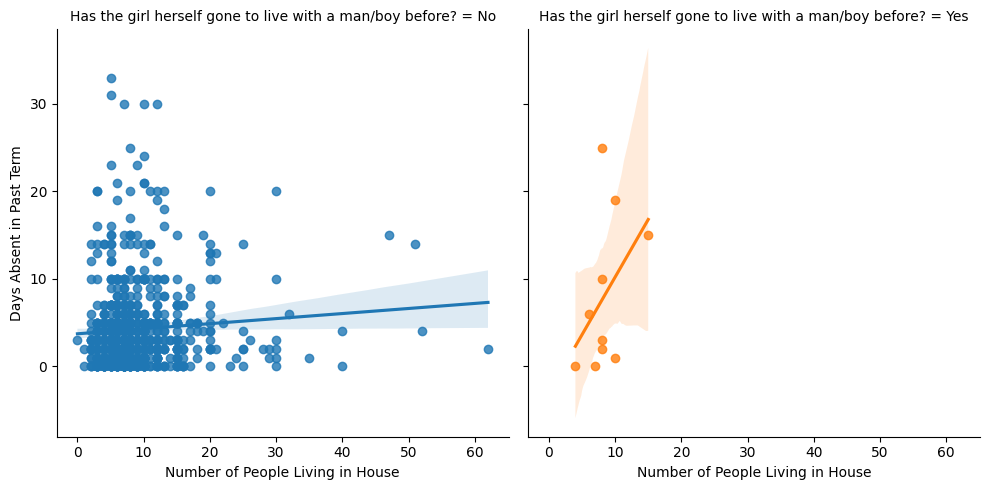

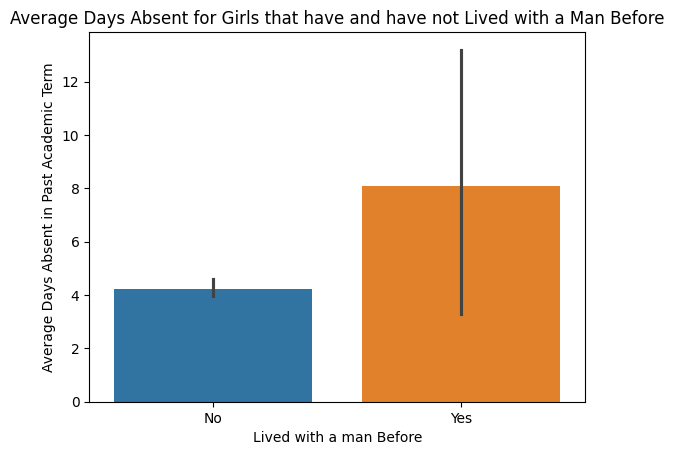

<Figure size 640x480 with 0 Axes>

In [183]:
# THIS Analysis of Number of Family Members with Attendance

# Get Plot Size
plt.figure(figsize=(9, 6))

# Check out How Number of Family Members Correlates with Attendance
df = df[df["How many people does girl live with in her household?"] < 999]

# Scatter Plot One: Number of People in Household, Live with a Man Before, and Days Absent 
df = df[df["Has the girl herself gone to live with a man/boy before?"] != "No response"]
scatter1 = sns.lmplot(x="How many people does girl live with in her household?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="Has the girl herself gone to live with a man/boy before?", hue="Has the girl herself gone to live with a man/boy before?", data=df)
scatter1.set(xlabel="Number of People Living in House", ylabel="Days Absent in Past Term")
plt.figure()

# Confusion Matrix with Two Cat and a Numerical

# How Does Ability to Pay Correlate with Attendance
man_absence = sns.barplot(hue="Has the girl herself gone to live with a man/boy before?", x="Has the girl herself gone to live with a man/boy before?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", estimator="mean", data=df)
man_absence.set(xlabel="Lived with a man Before", ylabel="Average Days Absent in Past Academic Term", title="Average Days Absent for Girls that have and have not Lived with a Man Before")
plt.figure()

<Figure size 640x480 with 0 Axes>

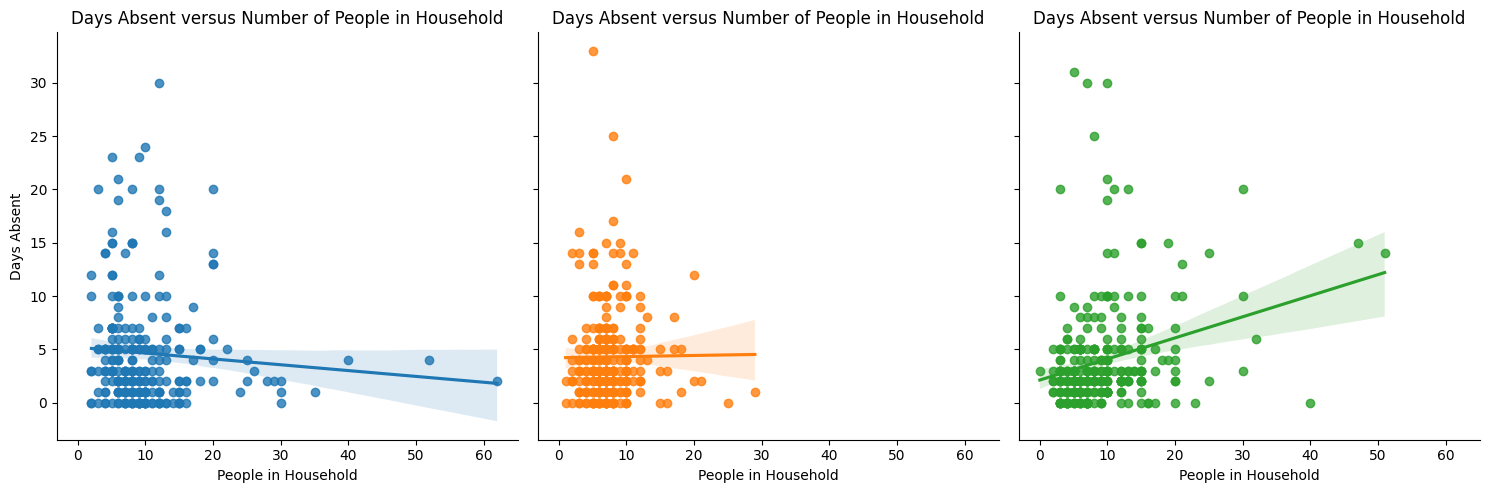

<Figure size 640x480 with 0 Axes>

In [169]:
# Get the Mean Attendance Per District Per Community - Edit 
scatter2 = sns.lmplot(x="How many people does girl live with in her household?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="District", hue="District", data=scatter_df1)
scatter2.set(xlabel="People in Household", ylabel="Days Absent", title="Days Absent versus Number of People in Household")
plt.figure()

<Figure size 640x480 with 0 Axes>

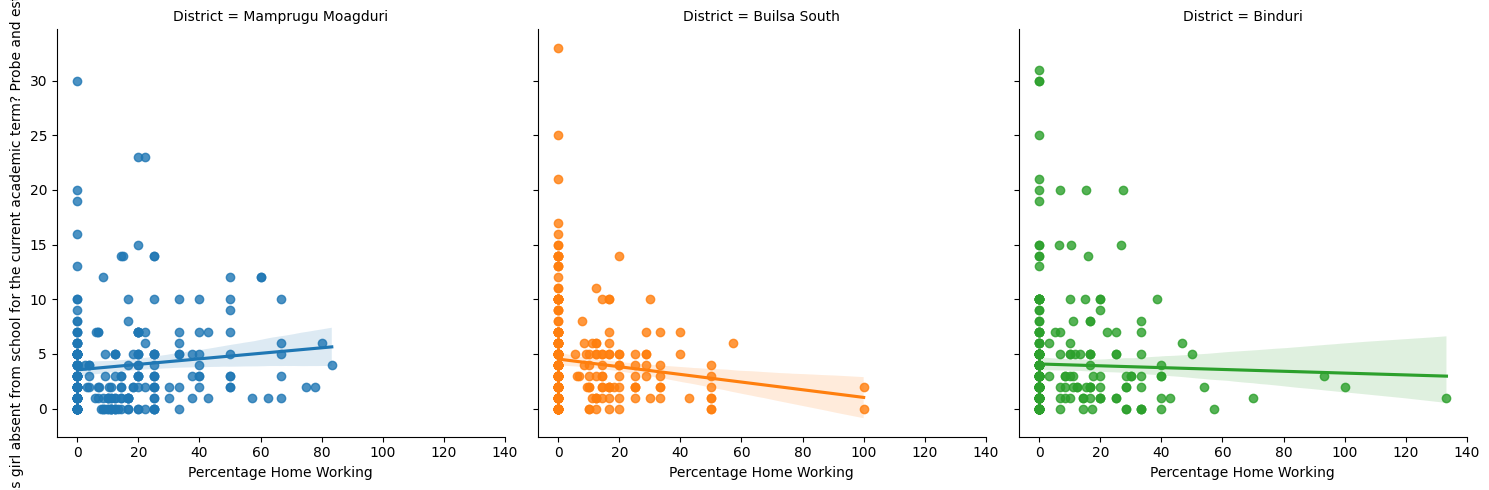

<Figure size 640x480 with 0 Axes>

In [171]:
# Percentage of People at Home Working
df["Percentage Home Working"] = df["How many of the people living in her household are working and earning income?"]/df["How many people does girl live with in her household?"] * 100
scatter3 = sns.lmplot(x="Percentage Home Working", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="District", hue="District", data=df)
plt.figure()

<Figure size 640x480 with 0 Axes>

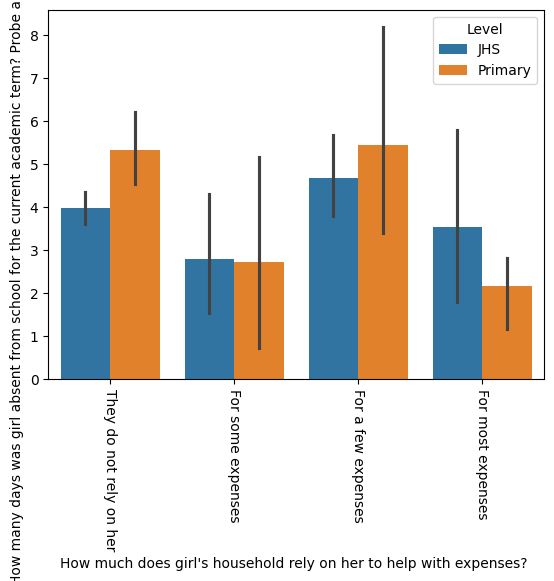

<Figure size 640x480 with 0 Axes>

In [172]:
val = sns.barplot(x="How much does girl's household rely on her to help with expenses? ", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", estimator="mean", hue="Level", data=df)
plt.xticks(rotation=-90)
plt.figure()

[Text(0.5, 0, 'Regularity of Attendance'),
 Text(0, 0.5, 'Percentage Home that is Working'),
 Text(0.5, 1.0, 'Percentage of the Home Working for Girls of Different Districts that Attend School at Different Regularities')]

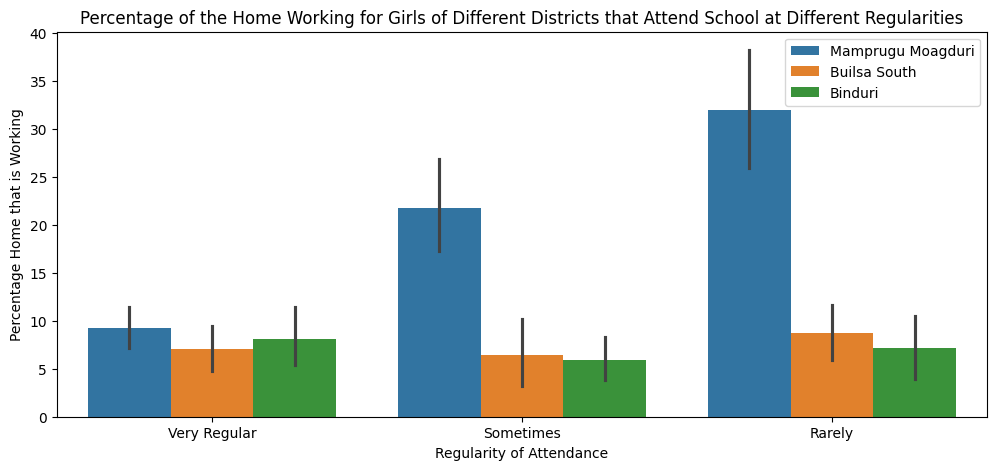

In [175]:
# THIS
df["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].replace({'Very regular(Rarely misses school)': 'Very Regular', 'Somehow regular(misses school at least once/twice in two weeks)': 'Sometimes', 'Chronic absentee(misses school at least once/twice in one week)':'Rarely'}, inplace=True)

# Switch Focus to Regularity 
plt.figure(figsize=(12, 5))
reg_perc = sns.barplot(x="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", y = "Percentage Home Working", estimator="mean", hue="District", data=df)
plt.legend(loc='upper right')
reg_perc.set(xlabel="Regularity of Attendance", ylabel="Percentage Home that is Working", title="Percentage of the Home Working for Girls of Different Districts that Attend School at Different Regularities")

[Text(0.5, 0, 'Income Dependence on Girl'),
 Text(0, 0.5, 'Proportion of Girls'),
 Text(0.5, 1.0, 'Distribution of School Attendance Regularity and Dependence on Girl for Income')]

<Figure size 1500x500 with 0 Axes>

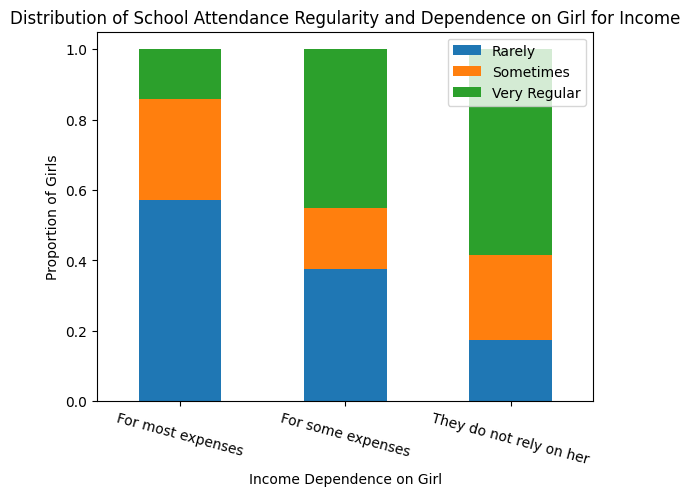

In [184]:
# THIS: How Often Girls Attend School Verse Dependency for Expenses 

plt.figure(figsize=(15, 5))
df = df[df["How much does girl's household rely on her to help with expenses? "] != "For a few expenses"]
df_grouped = df.groupby("How much does girl's household rely on her to help with expenses? ")["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].value_counts(normalize=True).unstack("In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers").plot.bar(stacked=True)
plt.legend(loc='upper right')
plt.xticks(rotation=-15)
df_grouped.set(xlabel="Income Dependence on Girl", ylabel="Proportion of Girls", title="Distribution of School Attendance Regularity and Dependence on Girl for Income")

[Text(0.5, 0, 'Community Name'),
 Text(0, 0.5, 'Percentage of Girls'),
 Text(0.5, 1.0, 'Distribution of Attendance Regularity and Dependence on Girl for Expenses')]

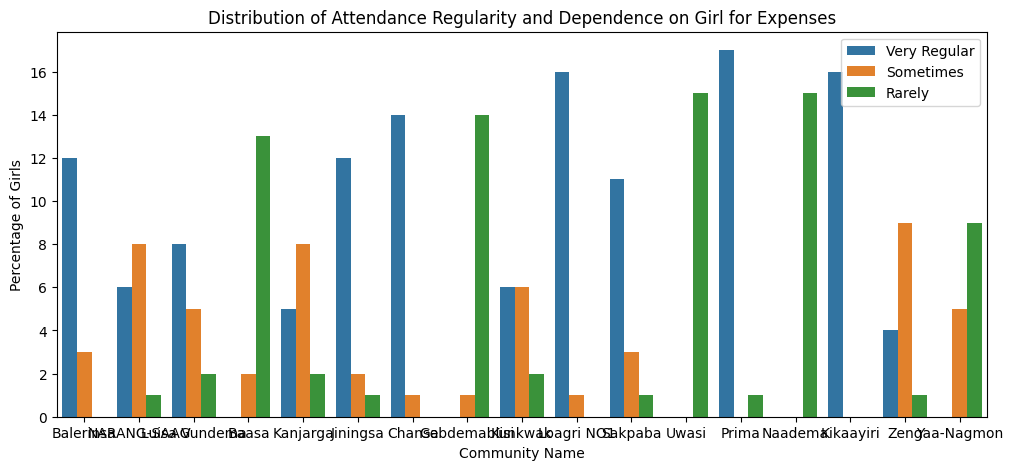

In [147]:
temp_df = df.groupby("Community name").filter(lambda x: len(x) > 19)

plt.figure(figsize=(12, 5))
reg_expenses = sns.countplot(x="Community name", hue="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", data=temp_df)
plt.legend(loc='upper right')
reg_expenses.set(xlabel="Community Name", ylabel="Number of Girls", title="Distribution of Attendance Regularity and Dependence on Girl for Expenses")

<Figure size 640x480 with 0 Axes>

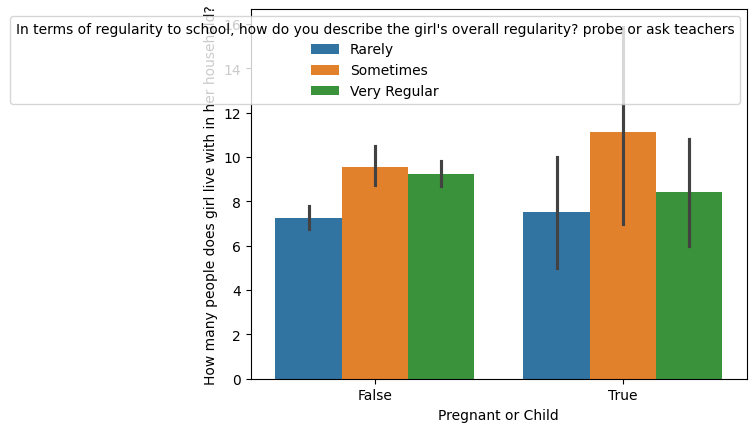

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_60168/3207883994.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("Textbook and other learning materials")["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].value_counts(normalize=True).unstack("In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers").plot.bar(stacked=True)


[Text(0.5, 0, 'Need for Textbook and other Learning Materials'),
 Text(0, 0.5, 'Proportion of Girls'),
 Text(0.5, 1.0, 'Distribution of School Attendance Regularity and Need for Textbook and Learning Materials')]

<Figure size 1500x500 with 0 Axes>

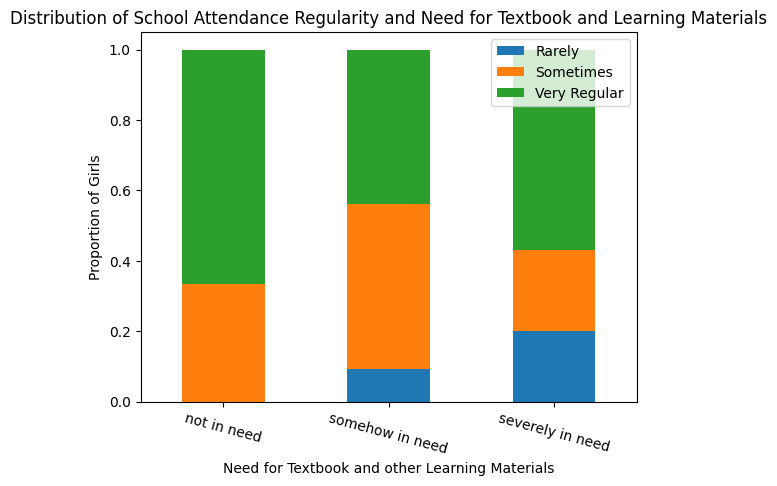

In [195]:
# THIS: How Often Girls Attend School Verse Dependency for Expenses 

# Define the custom category order
category_order = ["not in need", "somehow in need", "severely in need"]

# Convert the 'Textbook and other learning materials' column to a categorical type with the specified order
df['Textbook and other learning materials'] = pd.Categorical(df['Textbook and other learning materials'], categories=category_order, ordered=True)

plt.figure(figsize=(15, 5))
df_grouped = df.groupby("Textbook and other learning materials")["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].value_counts(normalize=True).unstack("In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers").plot.bar(stacked=True)
plt.legend(loc='upper right')
plt.xticks(rotation=-15)
df_grouped.set(xlabel="Need for Textbook and other Learning Materials", ylabel="Proportion of Girls", title="Distribution of School Attendance Regularity and Need for Textbook and Learning Materials")

/tmp/ipykernel_60168/3170653853.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("School uniform")["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].value_counts(normalize=True).unstack("In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers").plot.bar(stacked=True)


[Text(0.5, 0, 'Need for School uniform'),
 Text(0, 0.5, 'Proportion of Girls'),
 Text(0.5, 1.0, 'Distribution of School Attendance Regularity and Need for School uniform')]

<Figure size 1500x500 with 0 Axes>

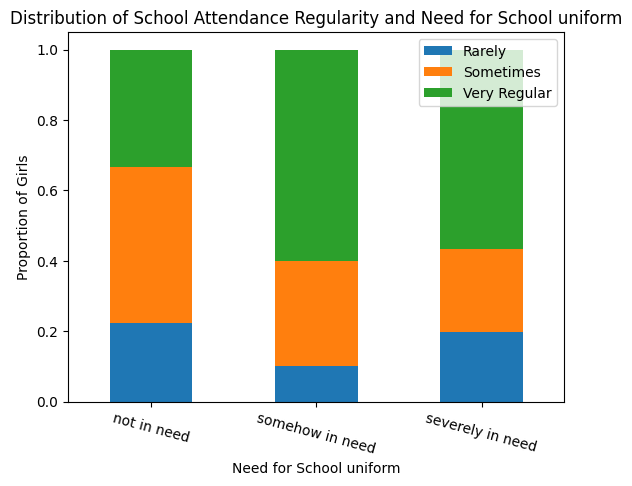

In [196]:
# THIS: How Often Girls Attend School Verse Dependency for Expenses 

# Define the custom category order
category_order = ["not in need", "somehow in need", "severely in need"]

# Convert the 'Textbook and other learning materials' column to a categorical type with the specified order
df['School uniform'] = pd.Categorical(df['School uniform'], categories=category_order, ordered=True)

plt.figure(figsize=(15, 5))
df_grouped = df.groupby("School uniform")["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].value_counts(normalize=True).unstack("In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers").plot.bar(stacked=True)
plt.legend(loc='upper right')
plt.xticks(rotation=-15)
df_grouped.set(xlabel="Need for School uniform", ylabel="Proportion of Girls", title="Distribution of School Attendance Regularity and Need for School uniform")